# DD2424 Assignment 1

**Authors:** Navid Farhadi (nfarhadi@kth.se)

**Course Instance:** DD2424 Deep Learning in Data Science VT19

### Computing the Gradient

The gradient of $W$ and $b$ is computed using the `computeGradients()` function. I was able to successfully write this function and the other necessary functions needed in order to compute the gradients of $W$ and $b$. In order to verify that the functions were written correctly I wrote the `computeGradientsNumerically()` function that computes the gradients using the finite difference method as well as the `compareGradients()` method that finds the relative error between the numerically computer gradient and analytically computed gradient.

Unfortunately `computeGradientsNumerically()` takes a very long time to run when using the entire data set so I tested the function using only subsets of the data with reduced dimensionality:

In [2]:
W, b = initialize()
X, Y, y = loadBatch("data_batch_1")

In [3]:
compareGradients(X[:500,0:100], Y[:,0:100], W[:,0:500],0,b)

Relative error for W: 6.795319862130199e-05
Relative error for b: 4.503064587827593e-07


In [4]:
compareGradients(X[:100,0:100], Y[:,0:100], W[:,0:100],0,b)

Relative error for W: 1.4085621557843861e-05
Relative error for b: 4.4808601275259097e-07


The relative errors for $W$ and $b$ are quite small so the `computeGradients()` function should be written correctly.

### Results

##### Test 1
$\lambda = 0$, `n_epochs` = 40, `n_batch` = 100, $\eta = 0.1$

Final test accuracy: 22.2 %
Final test loss: 8.367339768424289


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


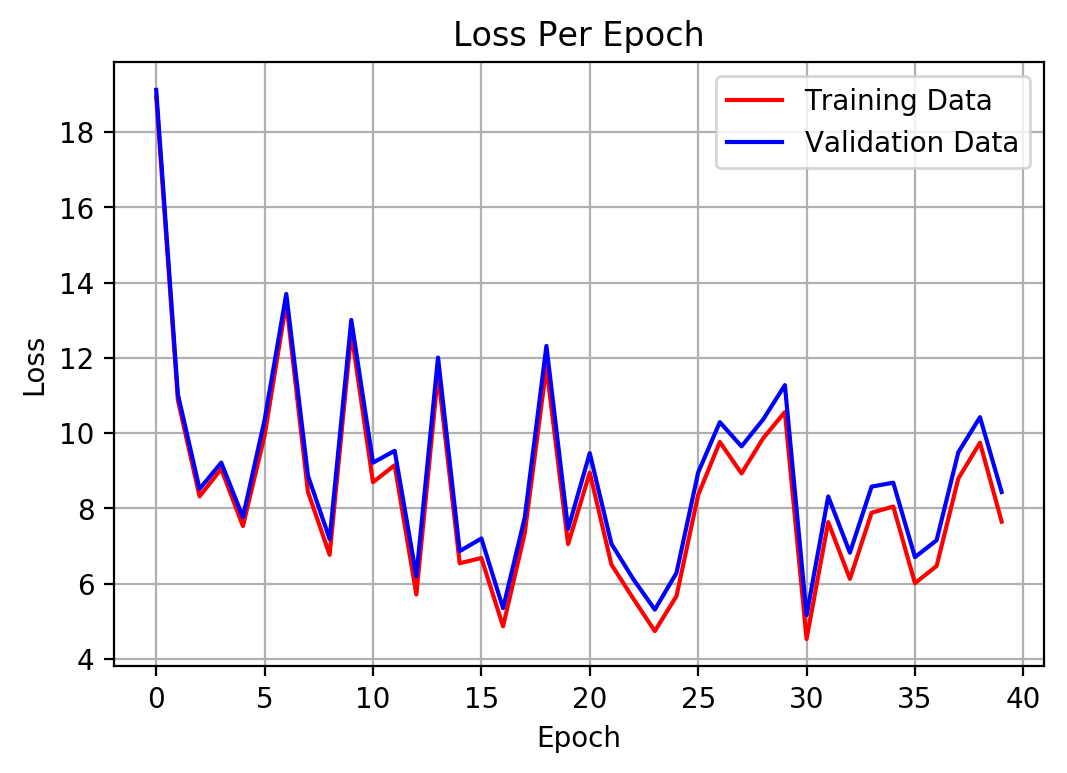

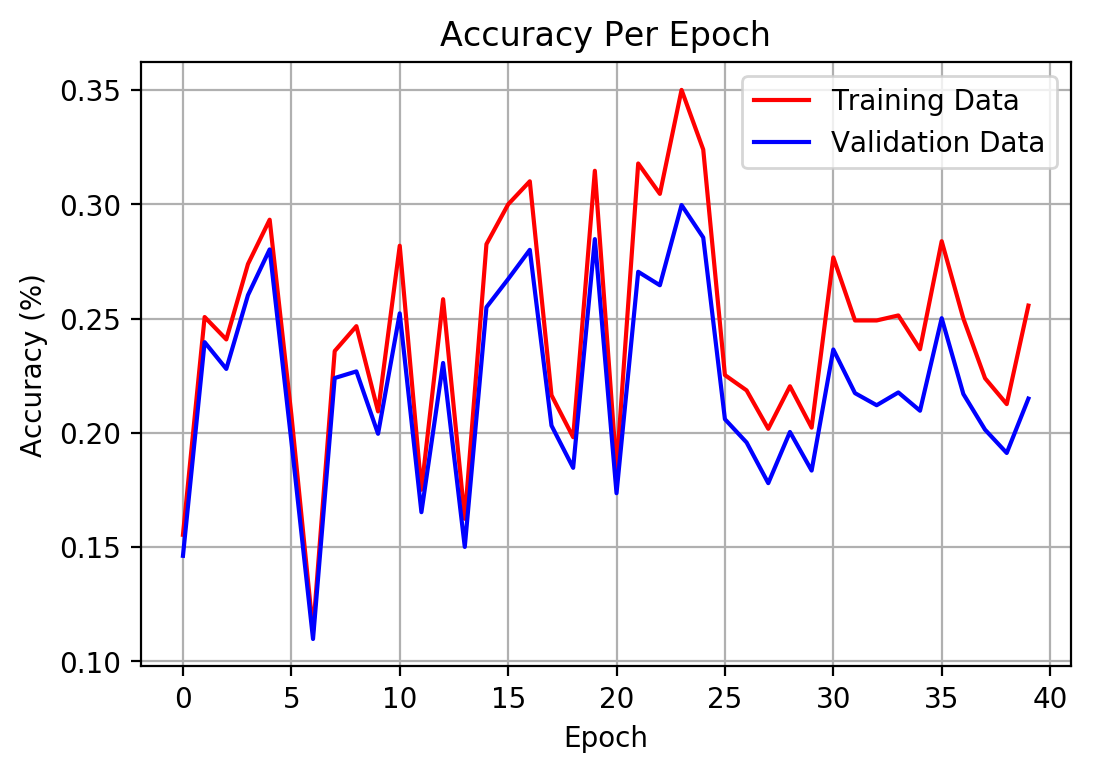

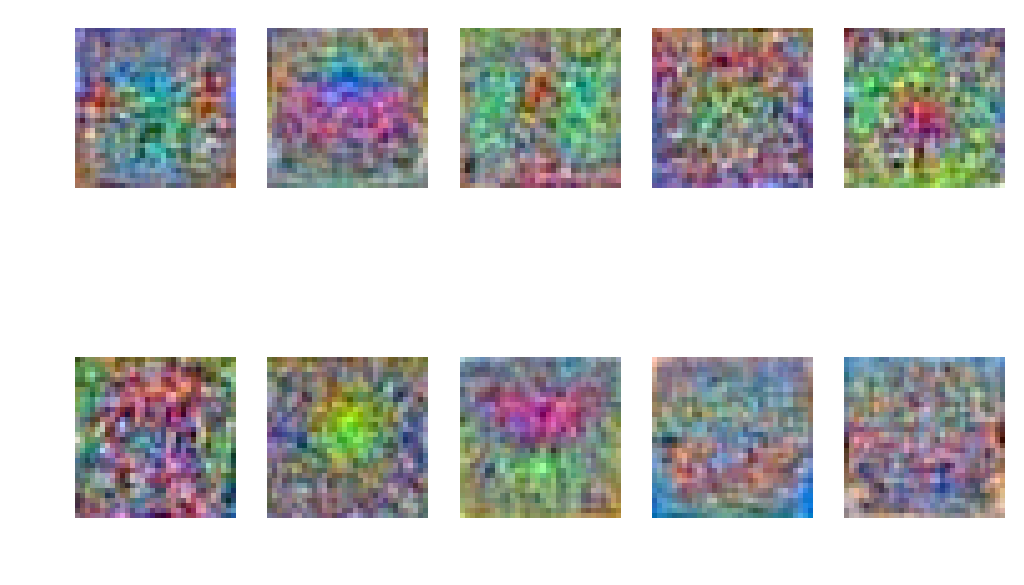

In [5]:
run(0,100,0.1,40)

##### Test 2
$\lambda = 0$, `n_epochs` = 40, `n_batch` = 100, $\eta = 0.01$

Final test accuracy: 36.86 %
Final test loss: 1.7976221592408446


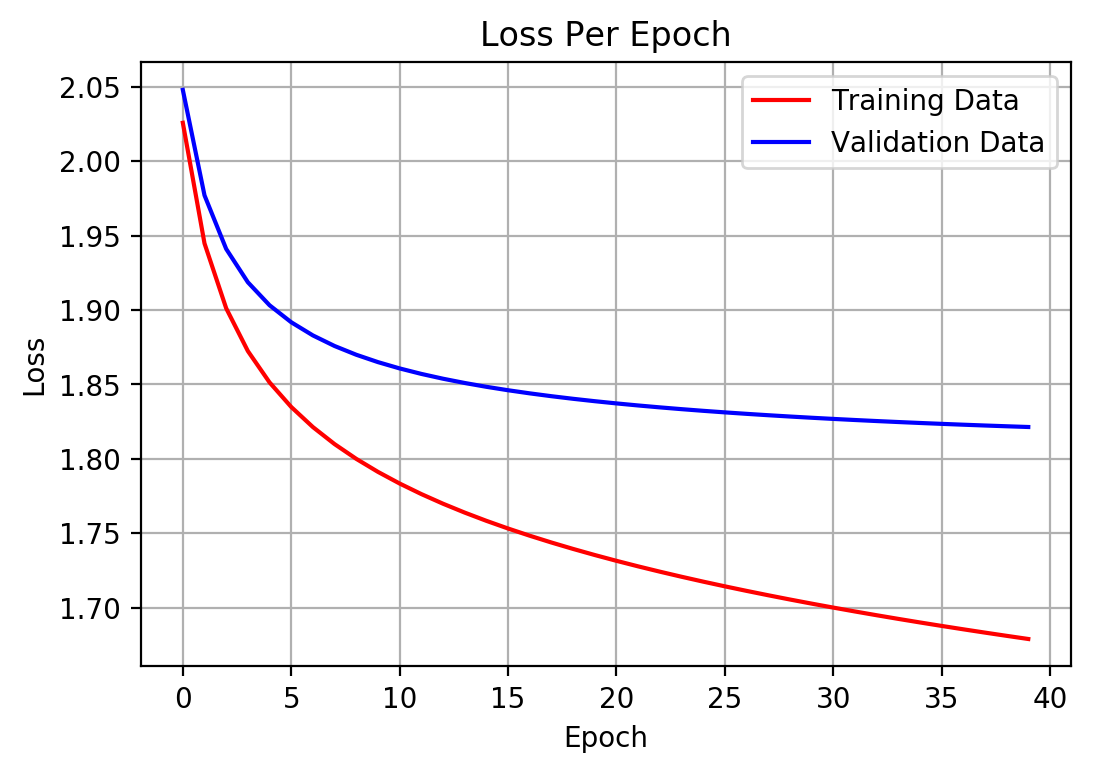

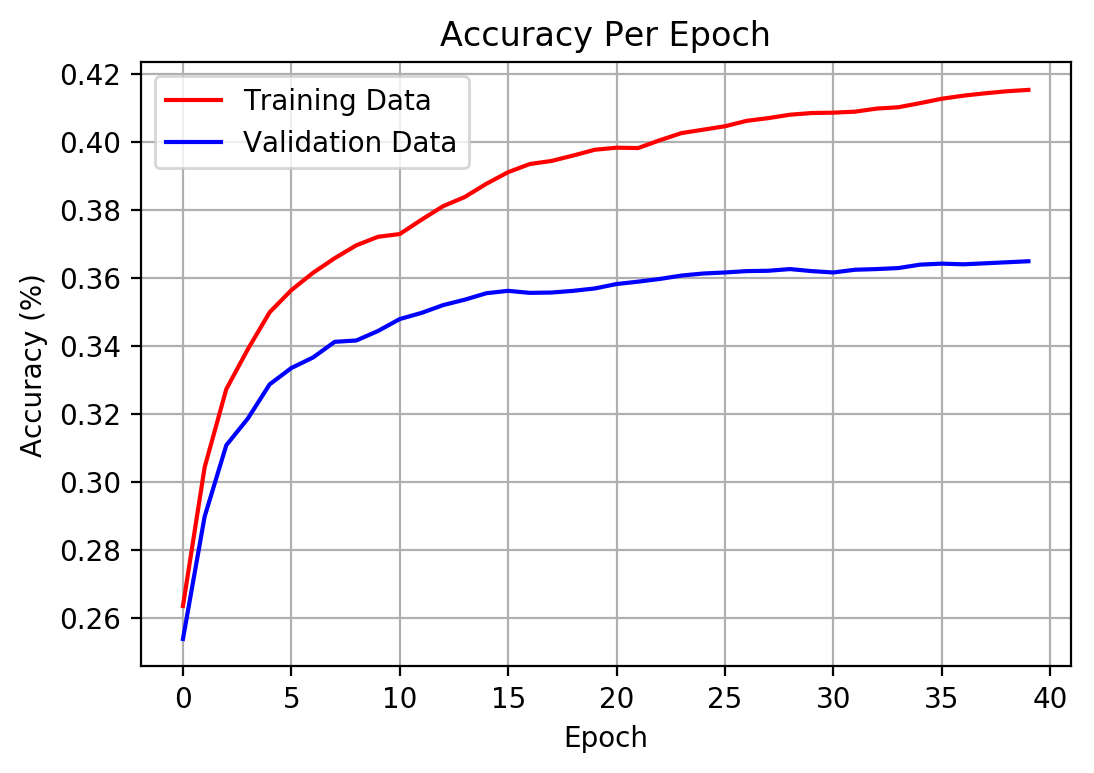

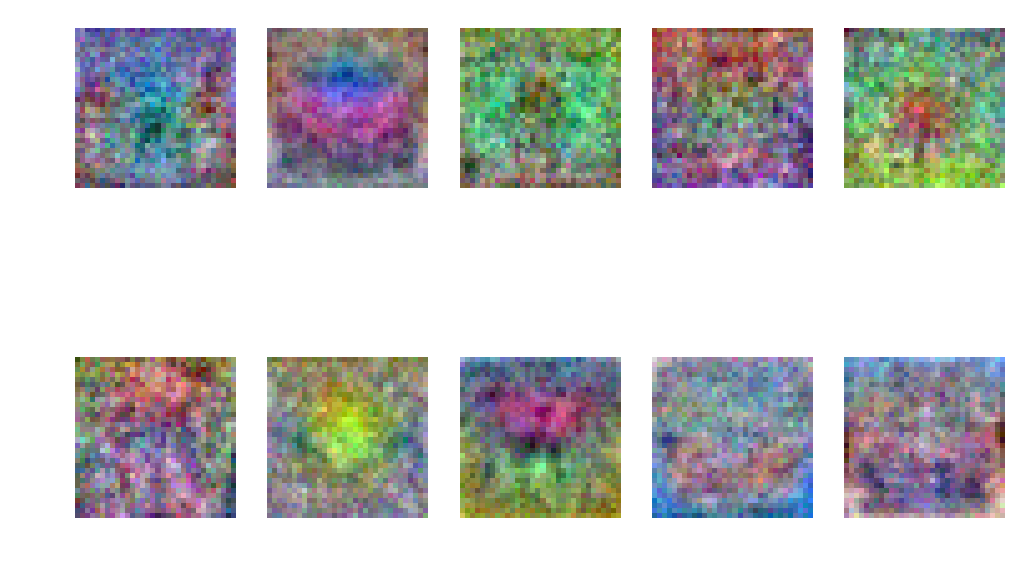

In [6]:
run(0,100,0.01,40)

##### Test 3 
$\lambda = 0.1$, `n_epochs` = 40, `n_batch` = 100, $\eta = 0.01$

Final test accuracy: 33.37 %
Final test loss: 1.912697476011188


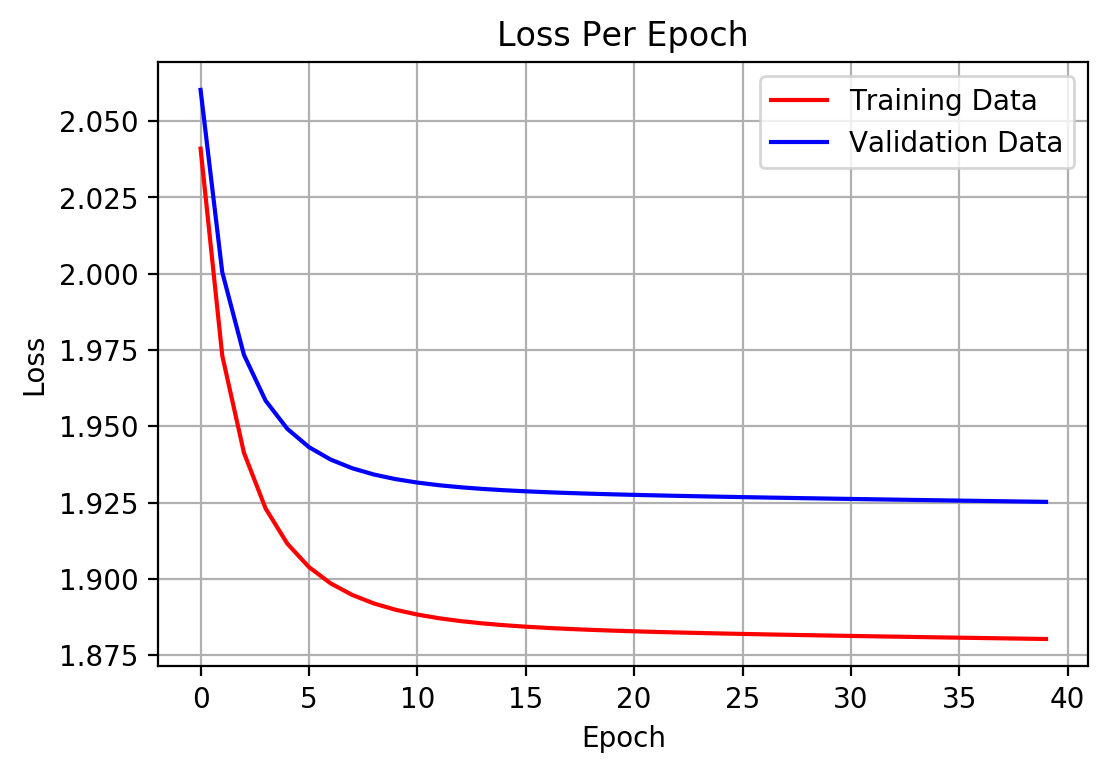

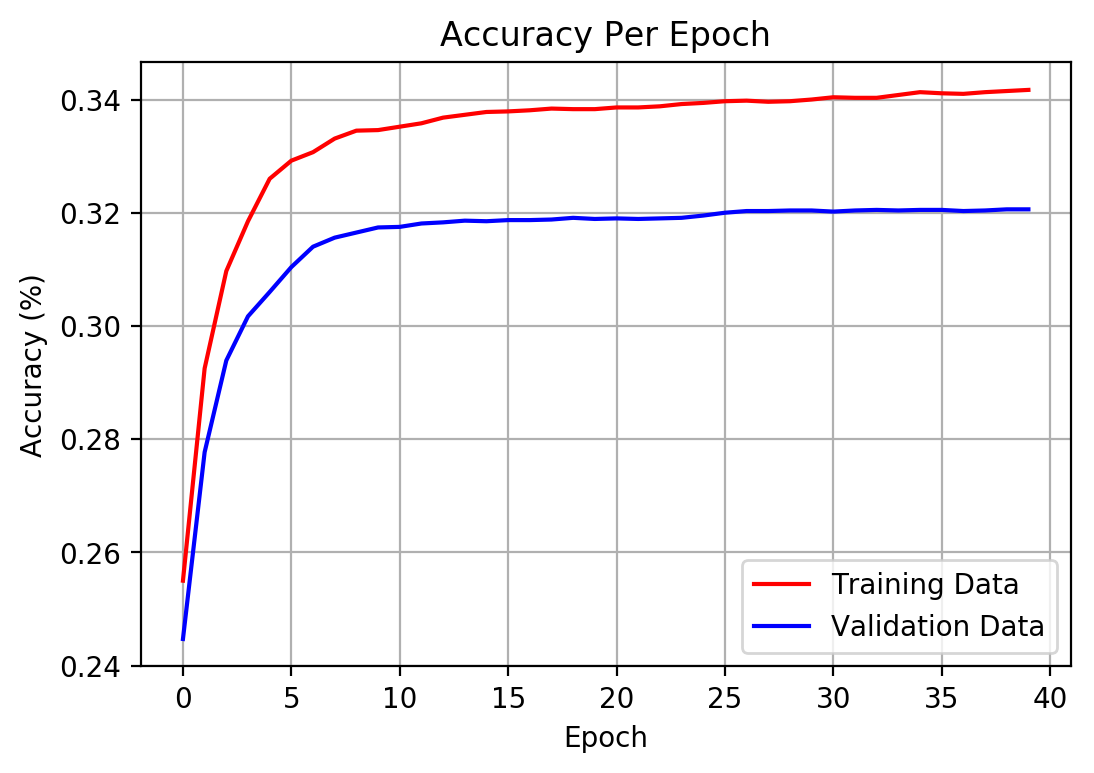

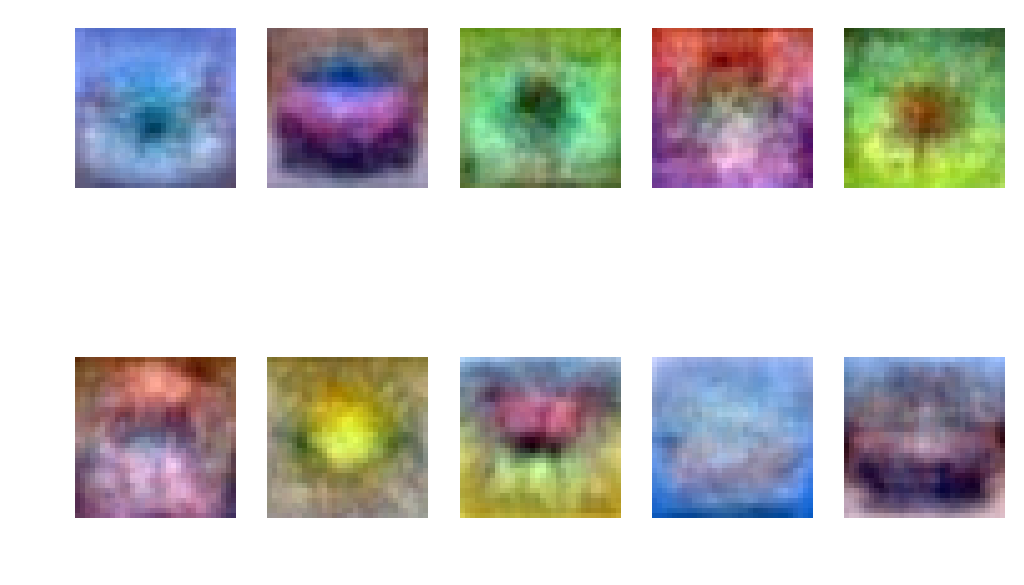

In [7]:
run(0.1,100,0.01,40)

##### Test 4
$\lambda = 1$, `n_epochs` = 40, `n_batch` = 100, $\eta = 0.01$:

Final test accuracy: 21.91 %
Final test loss: 2.1301517564506565


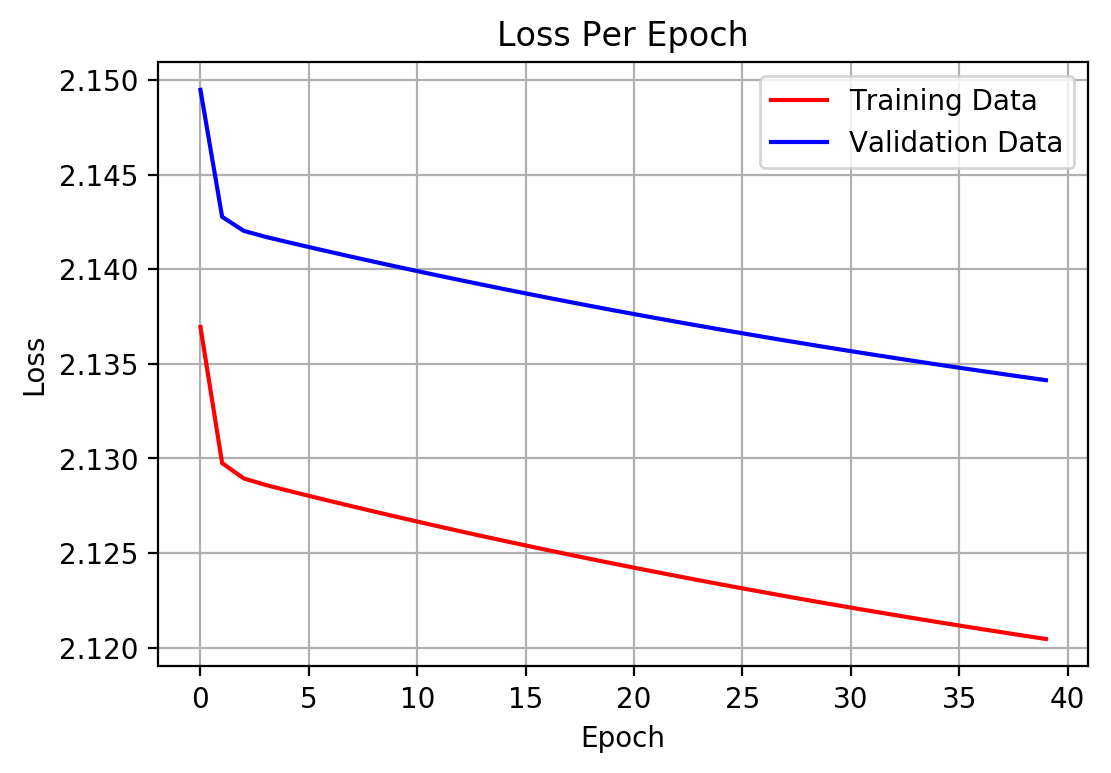

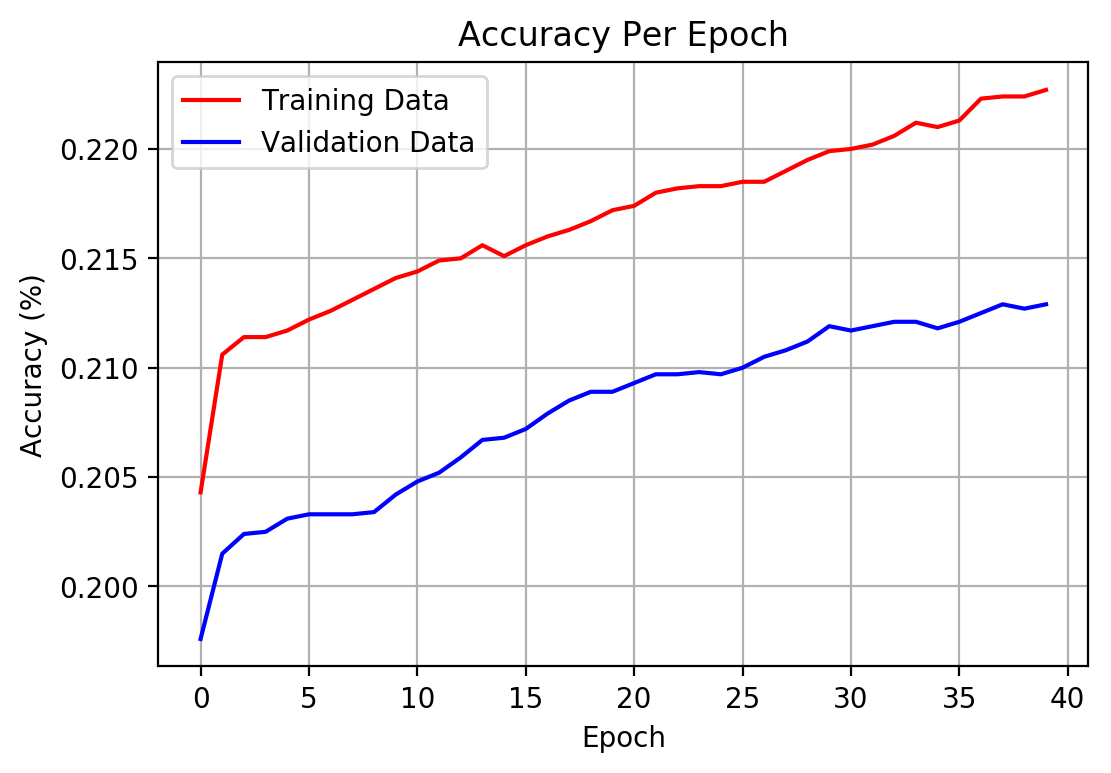

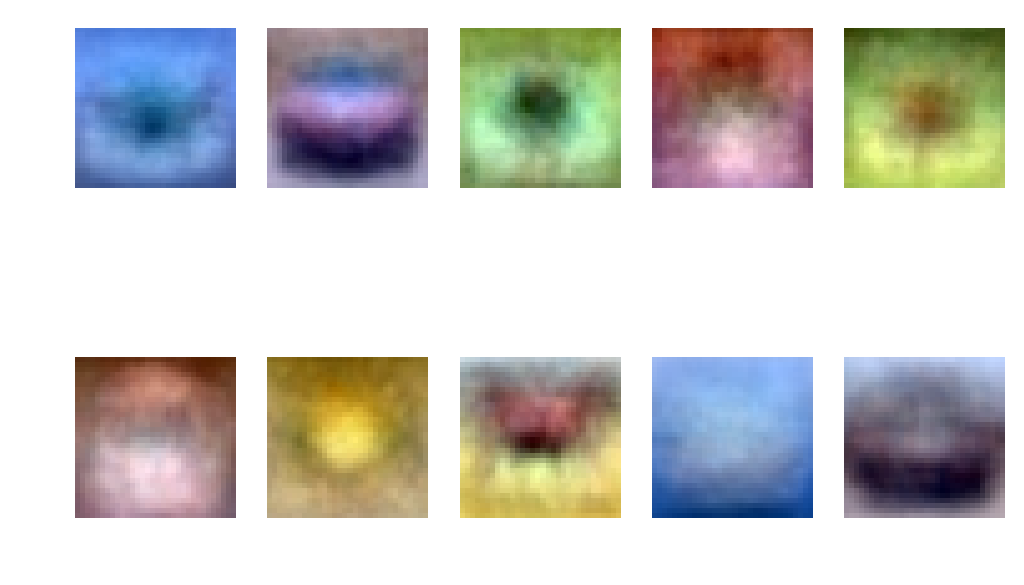

In [8]:
run(1,100,0.01,40)

In this network the form of regularization being used is $L_2$ regularization. This form of regularization encourages $W$ to not contain entries with large absolute values. In the results we can see that increasing the amount of regularization is not necessarily a good thing in every scenario. Test 2 had no regularization and the highest test accuracy of out of all the tests with around 37%. Test 3 added a regularization component with $\lambda = 0.1$ and the test accuracy dropped to around 33.5%.

The correct learning rate is also quite important. We can see from Test 1 that a large learning rate can allow for faster learning but at the cost of less stable convergence. The test accuracy is also not very good in the 40th epoch. The other tests have a smaller learning rate so mini-batch gradient descent takes a longer time to run but we get a much more stable convergence.

### Implementation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pickle

N = 10000
k = 10
eps = np.finfo(float).eps

def loadBatch(filename):
    with open("./cifar-10-batches-py/" + filename, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    X = np.array(dict[b'data']/255).T
    y = np.array(dict[b'labels'])
    
    Y = np.zeros((k,N))
    for i in range(N):
        Y[y[i]][i] = 1
    
    fo.close()
    return X,Y,y

def initialize():
    W = np.random.normal(0.0, 0.01, (10,3072))
    b = np.random.normal(0.0, 0.01, (10,1))

    return W, b

def evaluateClassifier(X, W, b):
    s = np.dot(W, X) + b
    P = np.exp(s) / np.sum(np.exp(s), axis=0)
    return P

def computeCost(P, Y, W, l):
    p_y = np.multiply(Y,P).sum(axis=0)
    p_y[p_y == 0] = eps
    return -np.log(p_y).sum() / (P.shape[1] + l * np.power(W,2).sum())

def computeAccuracy(P, y):
    predictions = np.argmax(P, axis=0)
    return np.sum(predictions == y) / P.shape[1]

def computeGradients(X, Y, W, l, b):
    grad_W = np.zeros_like(W)
    grad_b = np.zeros_like(b)
    
    P = evaluateClassifier(X,W,b)
    g = -(Y-P)
    grad_b = np.dot(g,np.ones((X.shape[1],1))) / X.shape[1]
    grad_W = np.add(np.dot(g,X.T) / X.shape[1], 2*l*W)

    return grad_W, grad_b

def computeGradientsNumerically(X,Y,W,b,l):
    grad_W = np.zeros_like(W)
    grad_b = np.zeros_like(b)

    P = evaluateClassifier(X,W,b)
    c = computeCost(P,Y,W,l)
    h = 1e-6

    for i in range(b.shape[0]):
        b[i] += h
        P = evaluateClassifier(X,W,b)
        c2 = computeCost(P,Y,W,l)
        grad_b[i] = (c2 - c) / h
        b[i] -= h

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i][j] += h
            P = evaluateClassifier(X,W,b)
            c2 = computeCost(P,Y,W,l)
            grad_W[i][j] = (c2 - c) / h
            W[i][j] -= h

    return grad_W, grad_b

def compareGradients(X,Y,W,l,b):
    grad_W, grad_b = computeGradients(X,Y,W,l,b)
    grad_W_num, grad_b_num = computeGradientsNumerically(X,Y,W,b,l)
    print("Relative error for W: " + str(np.abs(grad_W - grad_W_num).sum()))
    print("Relative error for b: " + str(np.abs(grad_b - grad_b_num).sum()))

def miniBatch(W, b, l, n_epochs, n_batch, eta):
    X, Y, y = loadBatch("data_batch_1")
    X_val, Y_val, y_val = loadBatch("data_batch_2")
    X_test, Y_test, y_test = loadBatch("test_batch")

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []

    for i in range(n_epochs):
        for j in range(0, N, n_batch):
            grad_W, grad_b = computeGradients(X[:,j:j+n_batch],Y[:,j:j+n_batch],W,l,b)
            W -= eta*grad_W
            b -= eta*grad_b
        
        P = evaluateClassifier(X,W,b)
        train_acc.append(computeAccuracy(P,y))
        train_loss.append(computeCost(P,Y,W,l))

        P_val = evaluateClassifier(X_val,W,b)
        val_acc.append(computeAccuracy(P_val,y_val))
        val_loss.append(computeCost(P_val,Y_val,W,l))

    P_test = evaluateClassifier(X_test,W,b)
    test_acc = computeAccuracy(P_test,y_test)
    test_loss = computeCost(P_test,Y_test,W,l)

    return W, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss

def run(l, n_batch, eta, n_epochs):
    W, b = initialize()
    W, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss = miniBatch(W,b,l,n_epochs,n_batch,eta)

    print("Final test accuracy: " + str(test_acc*100) + " %")
    print("Final test loss: " + str(test_loss))
    
    plt.rcParams['figure.dpi'] = 100
    
    plt.figure(1)
    plt.plot(train_loss, "r-", label="Training Data")
    plt.plot(val_loss, "b-", label="Validation Data")
    plt.title("Loss Per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid("true")
    plt.show()

    plt.figure(2)
    plt.plot(train_acc, "r-", label="Training Data")
    plt.plot(val_acc, "b-", label="Validation Data")
    plt.title("Accuracy Per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid("true")
    plt.show()

    plt.figure(3)
    for i, j in enumerate(W):
        plt.subplot(2, 5, i+1)
        plt.imshow(np.rot90(np.reshape((j - j.min()) / (j.max() - j.min()), (32, 32, 3), order='F'), k=3))
        plt.axis("off")
    plt.show()